In [ ]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [ ]:
# Basic imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Keep only the first two columns, rename them
df = df.iloc[:, :2]
df.columns = ["label", "message"]

df.head()
df["label"].value_counts()



,count
label,
ham,4825
spam,747


In [ ]:
# Drop any rows with missing text
df = df.dropna(subset=["message"])

# Convert labels to binary: spam = 1, ham = 0 (optional but nice)
df["label_num"] = df["label"].map({"ham": 0, "spam": 1})

print(df.head())
print(df["label_num"].value_counts())


  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0
label_num
0    4825
1     747
Name: count, dtype: int64


In [ ]:
X = df["message"].str.lower()  # lowercase text
y = df["label_num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

X_train_tfidf.shape, X_test_tfidf.shape


((4457, 7440), (1115, 7440))

In [ ]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)
y_pred_nb = nb_clf.predict(X_test_tfidf)

print("=== Naive Bayes Classification Report ===")
print(classification_report(y_test, y_pred_nb, target_names=["ham", "spam"]))


=== Naive Bayes Classification Report ===
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_tfidf, y_train)
y_pred_log = log_clf.predict(X_test_tfidf)

print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_log, target_names=["ham", "spam"]))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
def get_metrics(y_true, y_pred, name):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision_spam": precision_score(y_true, y_pred),
        "Recall_spam": recall_score(y_true, y_pred),
        "F1_spam": f1_score(y_true, y_pred)
    }

results = []
results.append(get_metrics(y_test, y_pred_nb, "Naive Bayes"))
results.append(get_metrics(y_test, y_pred_log, "Logistic Regression"))

metrics_df = pd.DataFrame(results)
metrics_df


,Model,Accuracy,Precision_spam,Recall_spam,F1_spam
0,Naive Bayes,0.968610,1.0,0.765101,0.866920
1,Logistic Regression,0.967713,1.0,0.758389,0.862595


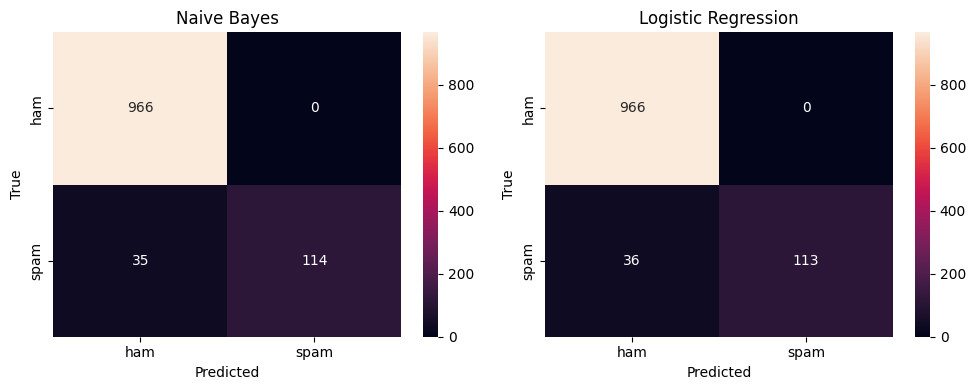

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_log = confusion_matrix(y_test, y_pred_log)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_nb, annot=True, fmt="d", ax=axes[0])
axes[0].set_title("Naive Bayes")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].set_xticklabels(["ham", "spam"])
axes[0].set_yticklabels(["ham", "spam"])

sns.heatmap(cm_log, annot=True, fmt="d", ax=axes[1])
axes[1].set_title("Logistic Regression")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].set_xticklabels(["ham", "spam"])
axes[1].set_yticklabels(["ham", "spam"])

plt.tight_layout()
plt.show()
